In [1]:
!pip install seaborn


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [2]:
import seaborn as sns

sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [93]:
import seaborn as sns

df = sns.load_dataset('taxis')

In [94]:
df

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


In [95]:
df.pickup_borough.value_counts()

pickup_borough
Manhattan    5268
Queens        657
Brooklyn      383
Bronx          99
Name: count, dtype: int64

In [96]:
df.dropoff_borough.value_counts()

dropoff_borough
Manhattan        5206
Queens            542
Brooklyn          501
Bronx             137
Staten Island       2
Name: count, dtype: int64

In [97]:
df.payment.unique()

array(['credit card', 'cash', nan], dtype=object)

In [98]:
df.payment.value_counts()

payment
credit card    4577
cash           1812
Name: count, dtype: int64

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# df = df[(df['method']=='Radial Velocity') | (df['method']=='Transit')] # 簡単のため、2品種に絞る

df.dropna(inplace=True)

le = LabelEncoder()
le.fit(df['payment'])
df['payment'] = le.transform(df['payment'])


le = LabelEncoder()
le.fit(df['color'])
df['color'] = le.transform(df['color'])


le = LabelEncoder()
le.fit(df['pickup_borough'])
df['pickup_borough'] = le.transform(df['pickup_borough'])


le = LabelEncoder()
le.fit(df['dropoff_borough'])
df['dropoff_borough'] = le.transform(df['dropoff_borough'])


X = df[['passengers', 'distance', 'fare', 'tip', 'total', 'color', "pickup_borough", "dropoff_borough"]] # 説明変数
Y = df['payment']
x_train, x_test, y_train, y_test = train_test_split(X.values, Y.values, test_size = 0.2, random_state = 0) # 80%のデータを学習データに、20%を検証データにする

In [100]:
Y.value_counts()

payment
1    4546
0    1795
Name: count, dtype: int64

In [101]:
import pandas as pd

# Assuming X is a pandas DataFrame
nan_values = X.isnull().sum()
print(nan_values)


passengers         0
distance           0
fare               0
tip                0
total              0
color              0
pickup_borough     0
dropoff_borough    0
dtype: int64


In [102]:
from sklearn.linear_model import LogisticRegression, LinearRegression

model = LogisticRegression()

In [106]:
# 学習
model.fit(x_train, y_train)

# 予測
pred = model.predict(x_test)


In [107]:
pred

array([1, 1, 1, ..., 0, 1, 1])

In [108]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print('confusion matrix = \n', confusion_matrix(y_true=y_test, y_pred=pred))
print('accuracy = ', accuracy_score(y_true=y_test, y_pred=pred))
print('precision = ', precision_score(y_true=y_test, y_pred=pred))
print('recall = ', recall_score(y_true=y_test, y_pred=pred))
print('f1 score = ', f1_score(y_true=y_test, y_pred=pred))


confusion matrix = 
 [[358  15]
 [ 57 839]]
accuracy =  0.9432624113475178
precision =  0.9824355971896955
recall =  0.9363839285714286
f1 score =  0.958857142857143


In [113]:
from binarymetamodel import BinaryMetaModel

metamodel = BinaryMetaModel(
    model1=LogisticRegression(),
    model2=LogisticRegression()
)

In [114]:
# 学習
metamodel.fit(x_train, y_train)

# 予測
pred = metamodel.predict(x_test)


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [115]:
pred

array([1, 1, 1, ..., 0, 1, 1])

In [116]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print('confusion matrix = \n', confusion_matrix(y_true=y_test, y_pred=pred))
print('accuracy = ', accuracy_score(y_true=y_test, y_pred=pred))
print('precision = ', precision_score(y_true=y_test, y_pred=pred))
print('recall = ', recall_score(y_true=y_test, y_pred=pred))
print('f1 score = ', f1_score(y_true=y_test, y_pred=pred))


confusion matrix = 
 [[358  15]
 [ 57 839]]
accuracy =  0.9432624113475178
precision =  0.9824355971896955
recall =  0.9363839285714286
f1 score =  0.958857142857143


In [117]:
metamodel = BinaryMetaModel(
    model1=LogisticRegression(),
    model2=LinearRegression()
)

In [118]:
# 学習
metamodel.fit(x_train, y_train)

# 予測
pred = metamodel.predict(x_test)


In [119]:
pred

array([[1.02402235],
       [0.99837618],
       [0.97755281],
       ...,
       [0.00877933],
       [0.98725994],
       [0.98942789]])

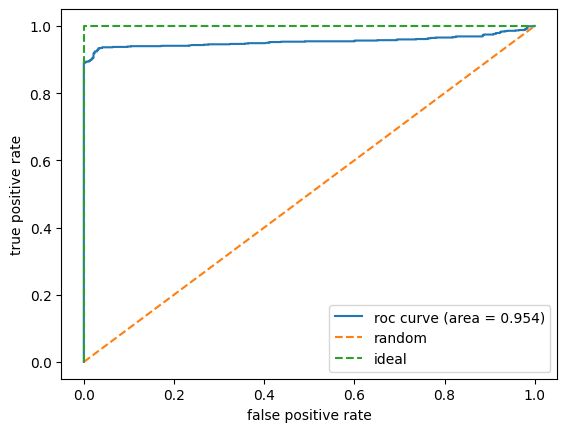

In [120]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=pred)

plt.plot(fpr, tpr, label='roc curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], linestyle='--', label='random')
plt.plot([0, 0, 1], [0, 1, 1], linestyle='--', label='ideal')
plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()
